In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

In [3]:
# 경고 메세지 숨기기 
import warnings
warnings.filterwarnings(action='ignore')

# 매직명령어 => 쥬피터노트북에서 그래프 예쁘게 삽입하는 기능
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

matplotlib.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 11.0
plt.rcParams['font.family'] = 'Malgun Gothic'

In [4]:
df = pd.read_csv('data/miniproj_dataset/train.csv', index_col='id')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
id,,,,,,,,,,,,,,
1,53,1,2,130,197,1,0,152,0,1.2,0,0,2,1
2,52,1,3,152,298,1,1,178,0,1.2,1,0,3,1
3,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
4,45,0,0,138,236,0,0,152,1,0.2,1,0,2,1
5,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1


## 데이터 요약

In [18]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,54.496689,0.682119,1.066225,132.033113,244.529801,0.158940,0.509934,150.629139,0.324503,0.976821,1.377483,0.602649,2.317881,0.549669
std,8.904586,0.467202,1.056213,17.909929,56.332206,0.366837,0.514685,23.466463,0.469747,1.085998,0.640226,0.917093,0.604107,0.499183
min,34.000000,0.000000,0.000000,94.000000,131.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.500000,0.000000,0.000000,120.000000,208.000000,0.000000,0.000000,136.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,155.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,270.000000,0.000000,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,192.000000,564.000000,1.000000,2.000000,195.000000,1.000000,5.600000,2.000000,3.000000,3.000000,1.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 1 to 151
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       151 non-null    int64  
 1   sex       151 non-null    int64  
 2   cp        151 non-null    int64  
 3   trestbps  151 non-null    int64  
 4   chol      151 non-null    int64  
 5   fbs       151 non-null    int64  
 6   restecg   151 non-null    int64  
 7   thalach   151 non-null    int64  
 8   exang     151 non-null    int64  
 9   oldpeak   151 non-null    float64
 10  slope     151 non-null    int64  
 11  ca        151 non-null    int64  
 12  thal      151 non-null    int64  
 13  target    151 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 17.7 KB


In [20]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## 전체 상관계수, pariplot, 히트맵 확인

In [7]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.093198,-0.142452,0.333521,0.222817,0.177720,-0.230188,-0.391406,0.181154,0.187196,-0.152385,0.339443,0.029941,-0.247806
sex,-0.093198,1.000000,-0.011094,-0.087967,-0.261557,0.024472,-0.042229,-0.010216,0.108632,0.141740,-0.064207,0.107782,0.242306,-0.246289
cp,-0.142452,-0.011094,1.000000,-0.002936,-0.016504,0.230745,-0.038009,0.251681,-0.379521,-0.128842,0.100808,-0.124067,-0.231730,0.436273
trestbps,0.333521,-0.087967,-0.002936,1.000000,0.187539,0.258959,-0.049577,-0.037929,0.103313,0.129670,-0.039470,0.078736,0.056325,-0.122850
chol,0.222817,-0.261557,-0.016504,0.187539,1.000000,0.057517,-0.146423,0.109218,-0.029214,0.096622,0.091094,0.049526,0.117261,0.036991
fbs,0.177720,0.024472,0.230745,0.258959,0.057517,1.000000,-0.079038,-0.005498,-0.069176,0.000942,-0.058464,0.089895,-0.049009,0.065821
restecg,-0.230188,-0.042229,-0.038009,-0.049577,-0.146423,-0.079038,1.000000,0.031770,0.055514,0.030829,-0.001340,-0.118697,0.096983,0.017528
thalach,-0.391406,-0.010216,0.251681,-0.037929,0.109218,-0.005498,0.031770,1.000000,-0.333734,-0.334791,0.267636,-0.203291,-0.079569,0.365249
exang,0.181154,0.108632,-0.379521,0.103313,-0.029214,-0.069176,0.055514,-0.333734,1.000000,0.319331,-0.254850,0.100126,0.221391,-0.396145
oldpeak,0.187196,0.141740,-0.128842,0.129670,0.096622,0.000942,0.030829,-0.334791,0.319331,1.000000,-0.564554,0.194849,0.269413,-0.421514


<AxesSubplot:>

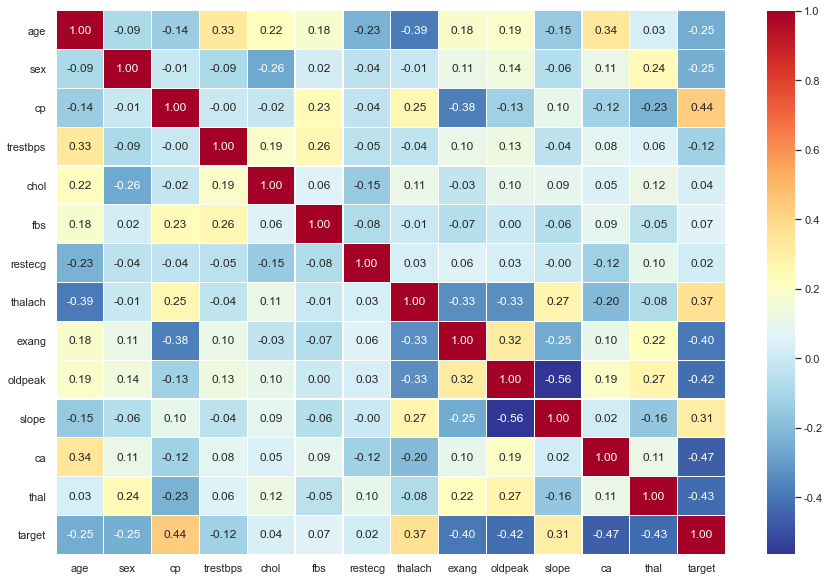

In [34]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot=True, cmap='RdYlBu_r', linewidths=0.2, fmt='.2f')

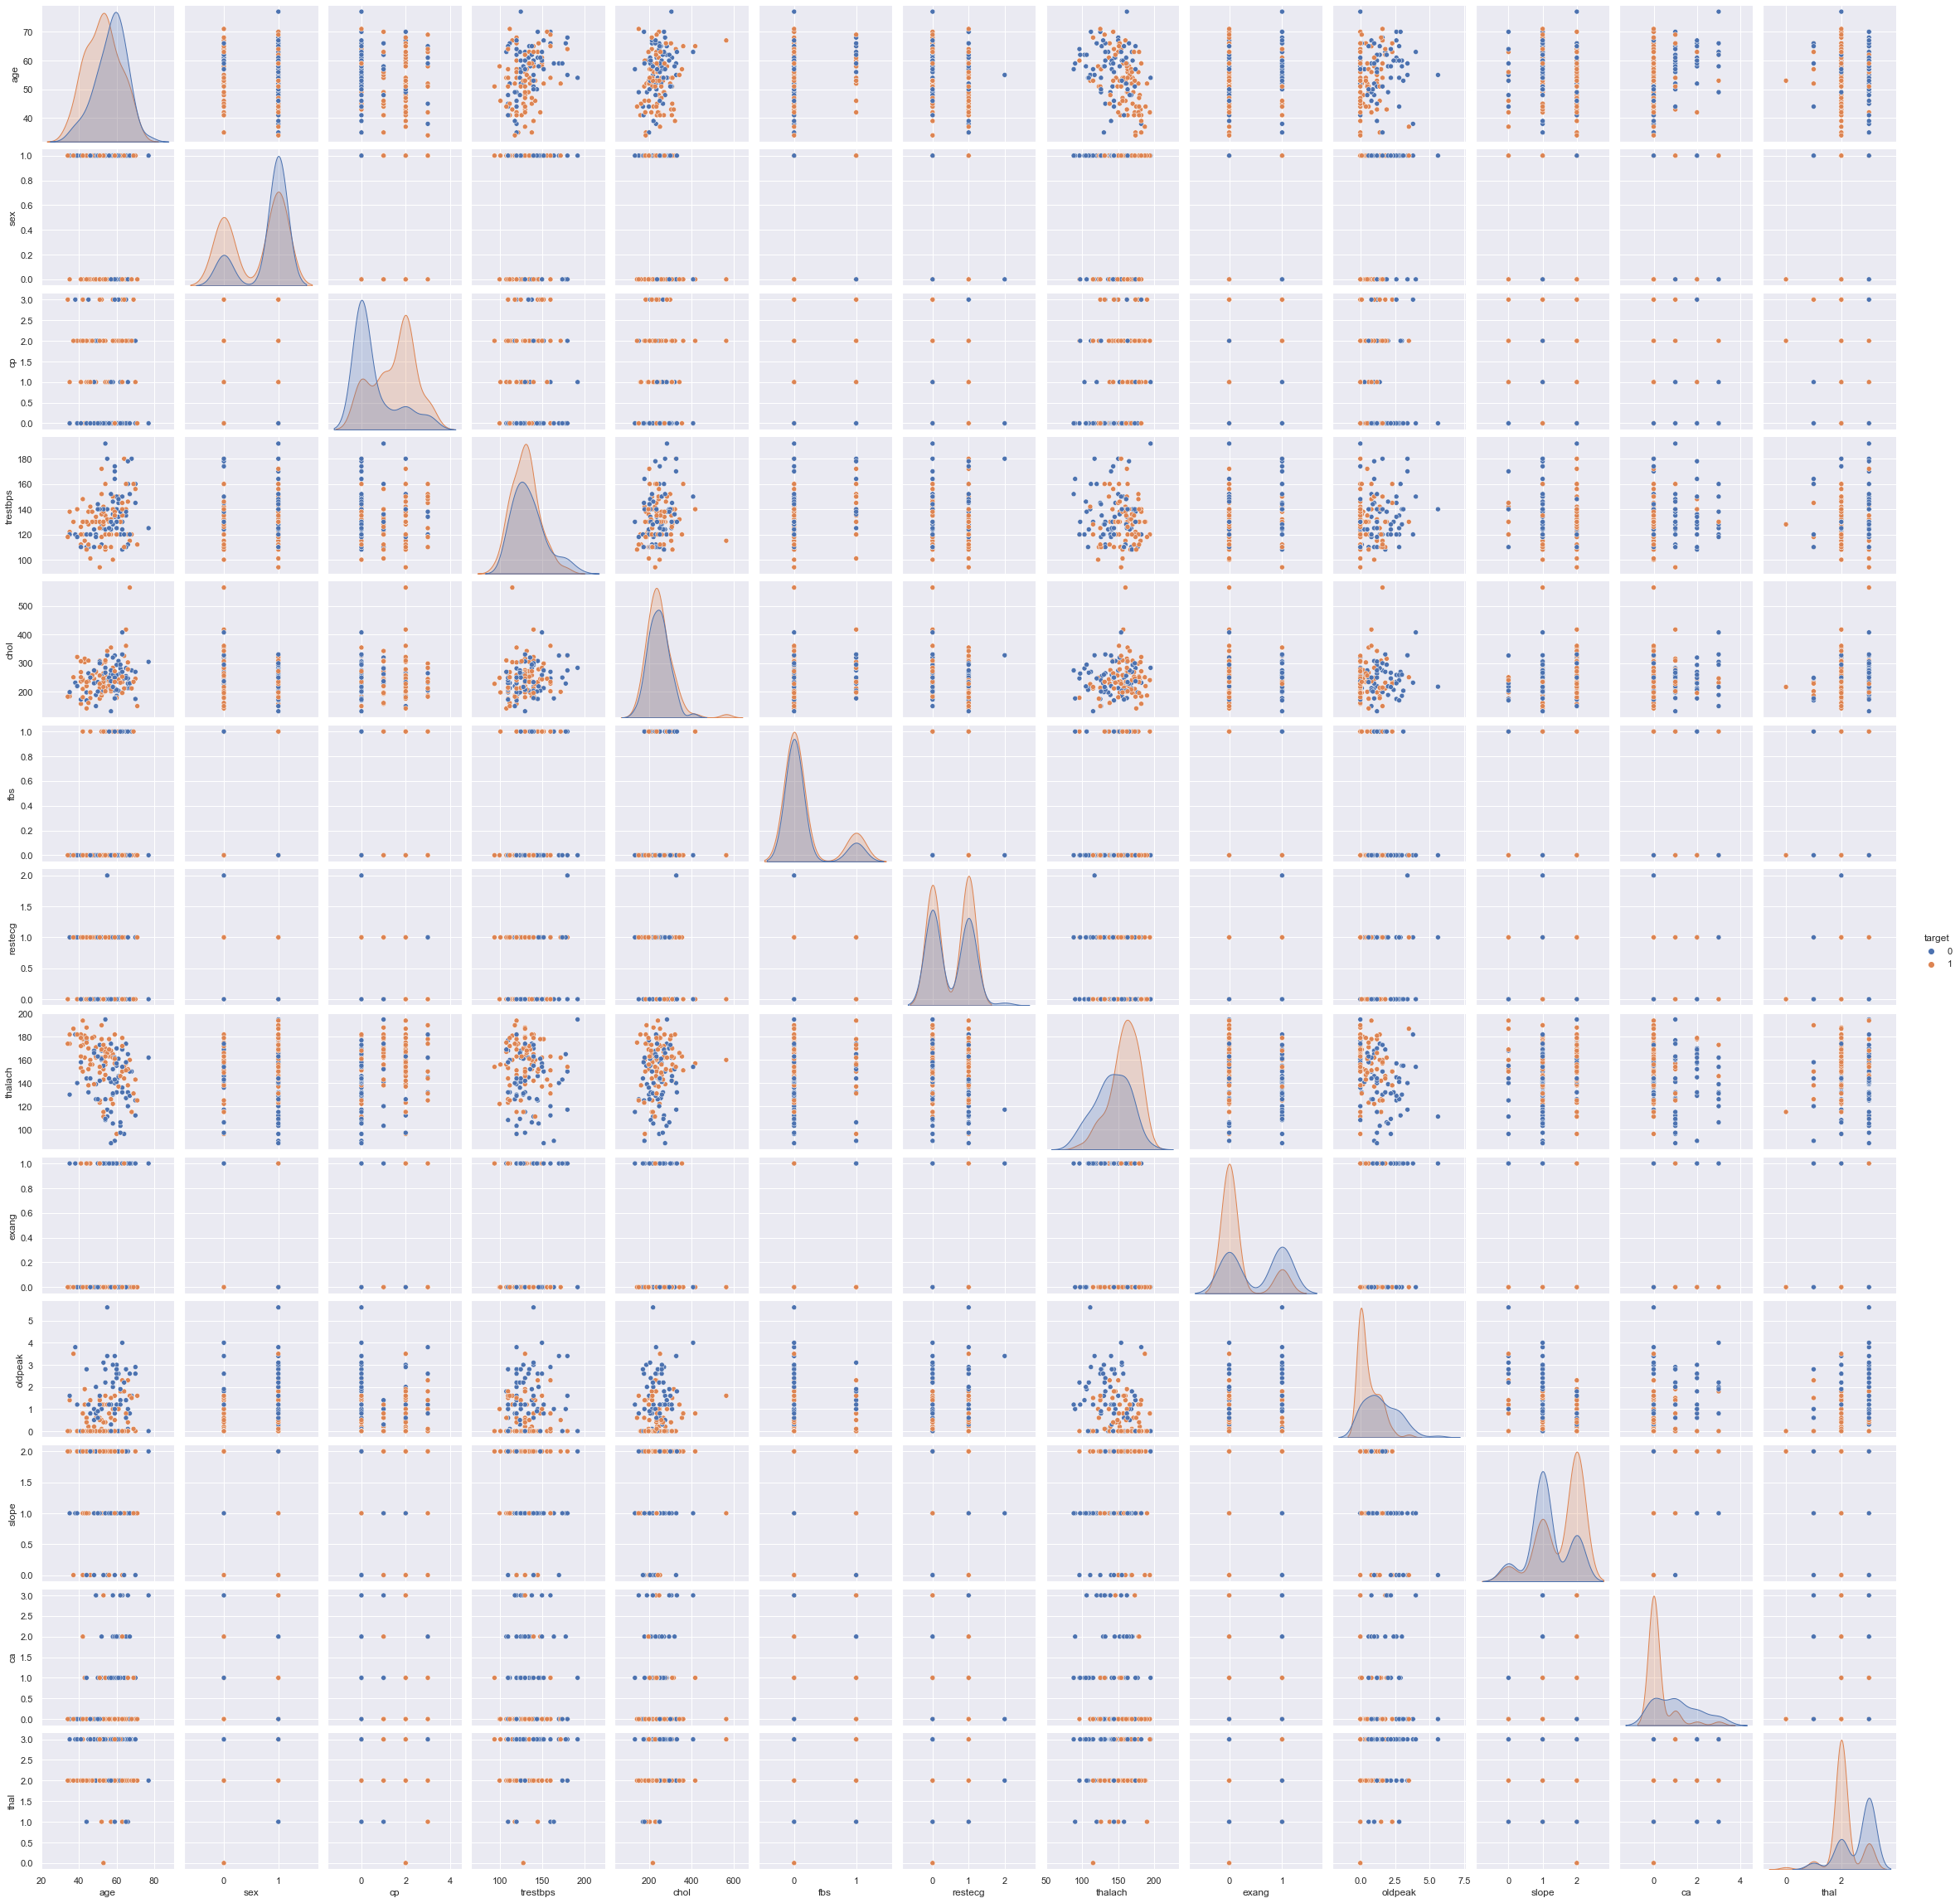

In [42]:
sns.pairplot(df, hue='target');

In [ ]:
* ca(-0.47), cp(0.44), thal(-0.43), oldpeak(-0.42), exang(-0.4), thalach(0.37), slope(0.31) 

## feature 범주형, 연속형 분리

### 범주형
- sex, cp, fbs, restecg, exang, slope, ca, thal

In [5]:
df_cat = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']]
df_cat.head()

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
id,,,,,,,,,
1,1,2,1,0,0,0,0,2,1
2,1,3,1,1,0,1,0,3,1
3,1,1,0,0,0,2,1,3,0
4,0,0,0,0,1,1,0,2,1
5,1,1,0,1,0,2,0,2,1


#### 교차분석을 통한 범주형 자료 상관관계 확인
=> fbs, restecg는 target과 관련성이 낮다

In [6]:
ct_sex_target = pd.crosstab(df_cat['sex'], df_cat['target'])
ct_sex_target

target,0,1
sex,,
0,13,35
1,55,48


In [7]:
ct_sex_target = pd.crosstab(df_cat['sex'], df_cat['target'])
ct_cp_target = pd.crosstab(df_cat['cp'], df_cat['target'])
ct_fbs_target = pd.crosstab(df_cat['fbs'], df_cat['target'])
ct_restecg_target = pd.crosstab(df_cat['restecg'], df_cat['target'])
ct_exang_target = pd.crosstab(df_cat['exang'], df_cat['target'])
ct_slope_target = pd.crosstab(df_cat['slope'], df_cat['target'])
ct_ca_target = pd.crosstab(df_cat['ca'], df_cat['target'])
ct_thal_target = pd.crosstab(df_cat['thal'], df_cat['target'])

In [8]:
from scipy.stats import chi2_contingency

result1 = chi2_contingency(observed=ct_sex_target, correction=False)
print("sex & target) 카이제곱 통계량: {:.4f} /// p-value: {:.4f}".format(result1[0], result1[1]))
# print("기대값 행렬:")
# pd.DataFrame(result1[3]).rename(index={0:'여자', 1:'남자'}, columns={0:'심장질환x', 1:'심장질환o'})

sex & target) 카이제곱 통계량: 9.1594 /// p-value: 0.0025


In [9]:
def get_chi2(crosstab):
    result = chi2_contingency(observed=crosstab, correction=False)
    print("카이제곱 통계량: {:.4f} /// p-value: {:.4f}".format(result[0], result[1]))

In [10]:
get_chi2(ct_sex_target)
get_chi2(ct_cp_target)
get_chi2(ct_fbs_target)
get_chi2(ct_restecg_target)
get_chi2(ct_exang_target)
get_chi2(ct_slope_target)
get_chi2(ct_ca_target)
get_chi2(ct_thal_target)


카이제곱 통계량: 9.1594 /// p-value: 0.0025
카이제곱 통계량: 40.1201 /// p-value: 0.0000
카이제곱 통계량: 0.6542 /// p-value: 0.4186
카이제곱 통계량: 1.4711 /// p-value: 0.4792
카이제곱 통계량: 23.6966 /// p-value: 0.0000
카이제곱 통계량: 20.0638 /// p-value: 0.0000
카이제곱 통계량: 41.0928 /// p-value: 0.0000
카이제곱 통계량: 42.7777 /// p-value: 0.0000


#### OneHot 인코딩
- fbs, restecg 제외

In [12]:
df_cat2 = df_cat.drop(['fbs', 'restecg'], axis=1)
df_cat2.head()

,sex,cp,exang,slope,ca,thal,target
id,,,,,,,
1,1,2,0,0,0,2,1
2,1,3,0,1,0,3,1
3,1,1,0,2,1,3,0
4,0,0,1,1,0,2,1
5,1,1,0,2,0,2,1


In [14]:
df_cat2.columns

Index(['sex', 'cp', 'exang', 'slope', 'ca', 'thal', 'target'], dtype='object')

In [28]:
df_cat2_OH = pd.get_dummies(df_cat2, columns=['sex', 'cp', 'exang', 'slope', 'ca', 'thal'])
df_cat2_OH

,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_0,thal_1,thal_2,thal_3
id,,,,,,,,,,,,,,,,,,,,
1,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0
2,1,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1
3,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1
4,1,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0
5,1,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1
148,1,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1
149,1,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0


### 연속형
- age, trestbps, chol, thalach, oldpeak

In [18]:
df_num = df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']]
df_num.describe()

,age,trestbps,chol,thalach,oldpeak,target
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,54.496689,132.033113,244.529801,150.629139,0.976821,0.549669
std,8.904586,17.909929,56.332206,23.466463,1.085998,0.499183
min,34.000000,94.000000,131.000000,88.000000,0.000000,0.000000
25%,48.500000,120.000000,208.000000,136.500000,0.000000,0.000000
50%,54.000000,130.000000,239.000000,155.000000,0.800000,1.000000
75%,61.000000,140.000000,270.000000,168.000000,1.600000,1.000000
max,77.000000,192.000000,564.000000,195.000000,5.600000,1.000000


#### 상관계수, 히트맵, pairplot

In [19]:
df_num.corr()

,age,trestbps,chol,thalach,oldpeak,target
age,1.000000,0.333521,0.222817,-0.391406,0.187196,-0.247806
trestbps,0.333521,1.000000,0.187539,-0.037929,0.129670,-0.122850
chol,0.222817,0.187539,1.000000,0.109218,0.096622,0.036991
thalach,-0.391406,-0.037929,0.109218,1.000000,-0.334791,0.365249
oldpeak,0.187196,0.129670,0.096622,-0.334791,1.000000,-0.421514
target,-0.247806,-0.122850,0.036991,0.365249,-0.421514,1.000000


<AxesSubplot:>

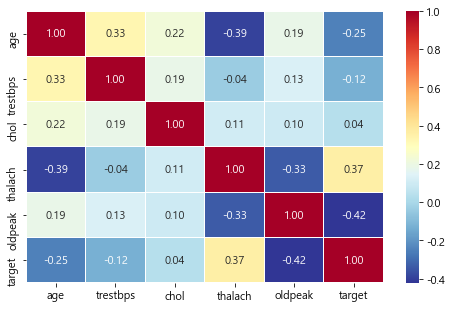

In [20]:
plt.figure(figsize = (8,5))
sns.heatmap(df_num.corr(), annot=True, cmap='RdYlBu_r', linewidths=0.2, fmt='.2f')

<Figure size 1080x720 with 0 Axes>

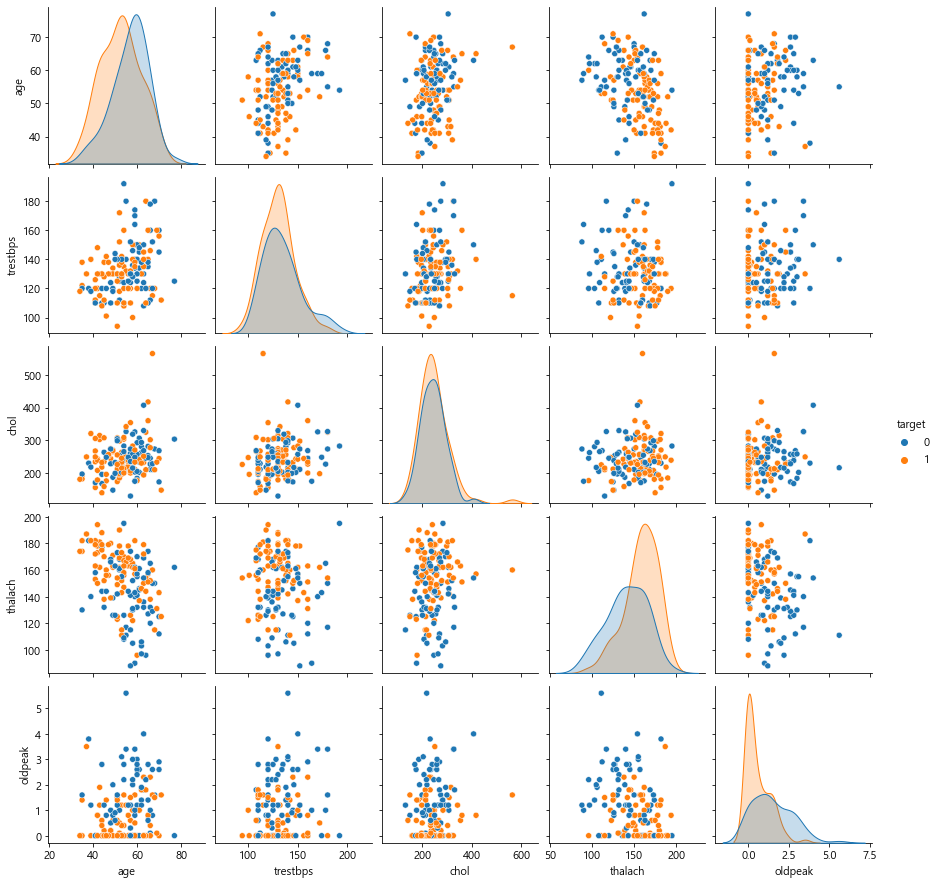

In [21]:
plt.figure(figsize = (15,10))
sns.pairplot(df_num, hue='target')
plt.show()

#### 다중공선성 확인 (VIF)

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
dfX = df_num.iloc[:,:-1]
vif['features'] = dfX.columns
vif["VIF Factor"] = [variance_inflation_factor(dfX.values, i) for i in range(dfX.shape[1])]
vif = vif.sort_values("VIF Factor").reset_index(drop=True)
vif

,features,VIF Factor
0,oldpeak,2.047640
1,chol,22.619504
2,thalach,28.888366
3,age,38.601616
4,trestbps,56.840290


#### 정규화 후 다시 다중공선성 확인

In [29]:
dfX

,age,trestbps,chol,thalach,oldpeak
id,,,,,
1,53,130,197,152,1.2
2,52,152,298,178,1.2
3,54,192,283,195,0.0
4,45,138,236,152,0.2
5,35,122,192,174,0.0
...,...,...,...,...,...
147,50,140,233,163,0.6
148,51,94,227,154,0.0
149,69,160,234,131,0.1


In [34]:
scaler_num = MinMaxScaler()
x_scaled = scaler_num.fit_transform(dfX)
dfX_scaled = pd.DataFrame(x_scaled, columns=dfX.columns)
dfX_scaled

,age,trestbps,chol,thalach,oldpeak
0,0.441860,0.367347,0.152425,0.598131,0.214286
1,0.418605,0.591837,0.385681,0.841121,0.214286
2,0.465116,1.000000,0.351039,1.000000,0.000000
3,0.255814,0.448980,0.242494,0.598131,0.035714
4,0.023256,0.285714,0.140878,0.803738,0.000000
...,...,...,...,...,...
146,0.372093,0.469388,0.235566,0.700935,0.107143
147,0.395349,0.000000,0.221709,0.616822,0.000000
148,0.813953,0.673469,0.237875,0.401869,0.017857
149,0.279070,0.265306,0.272517,0.523364,0.142857


In [40]:
dfX_scaled['id'] = [i for i in range(1,152,1)]
dfX_scaled = dfX_scaled.set_index('id')
dfX_scaled

,age,trestbps,chol,thalach,oldpeak
id,,,,,
1,0.441860,0.367347,0.152425,0.598131,0.214286
2,0.418605,0.591837,0.385681,0.841121,0.214286
3,0.465116,1.000000,0.351039,1.000000,0.000000
4,0.255814,0.448980,0.242494,0.598131,0.035714
5,0.023256,0.285714,0.140878,0.803738,0.000000
...,...,...,...,...,...
147,0.372093,0.469388,0.235566,0.700935,0.107143
148,0.395349,0.000000,0.221709,0.616822,0.000000
149,0.813953,0.673469,0.237875,0.401869,0.017857


In [41]:
vif_scaled = pd.DataFrame()
dfX = df_num.iloc[:,:-1]
vif_scaled['features'] = dfX_scaled.columns
vif_scaled["VIF Factor"] = [variance_inflation_factor(dfX_scaled.values, i) for i in range(dfX_scaled.shape[1])]
vif_scaled = vif_scaled.sort_values("VIF Factor").reset_index(drop=True)
vif_scaled

,features,VIF Factor
0,oldpeak,1.915707
1,thalach,4.686417
2,chol,5.725585
3,age,6.153463
4,trestbps,6.263192


## train, test 데이터셋

In [44]:
df_scaledX = pd.concat([dfX_scaled, df_cat2_OH], axis=1)
df_scaledX

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_0,thal_1,thal_2,thal_3
id,,,,,,,,,,,,,,,,,,,,,
1,0.441860,0.367347,0.152425,0.598131,0.214286,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0.418605,0.591837,0.385681,0.841121,0.214286,1,0,1,0,0,...,1,0,1,0,0,0,0,0,0,1
3,0.465116,1.000000,0.351039,1.000000,0.000000,0,0,1,0,1,...,0,1,0,1,0,0,0,0,0,1
4,0.255814,0.448980,0.242494,0.598131,0.035714,1,1,0,1,0,...,1,0,1,0,0,0,0,0,1,0
5,0.023256,0.285714,0.140878,0.803738,0.000000,1,0,1,0,1,...,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,0.372093,0.469388,0.235566,0.700935,0.107143,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
148,0.395349,0.000000,0.221709,0.616822,0.000000,1,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
149,0.813953,0.673469,0.237875,0.401869,0.017857,1,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0


In [47]:
x_data = df_scaledX.values
y_data = df[['target']].values

In [58]:
x_train, x_test, y_train, y_test = train_test_split( x_data, y_data, test_size=0.3, stratify=y_data)
x_train, x_valid, y_train, y_valid = train_test_split( x_train, y_train, test_size=0.2, stratify=y_train)

## 텐서

### 학습

In [59]:
x = tf.constant(x_train, tf.float32)
y = tf.constant(y_train, tf.float32)

#xavier, he ==> ( 최적의 초기화 알고리즘 )
initX = tf.initializers.GlorotUniform()
w = tf.Variable( initX(shape=[ x_train.shape[1], y_train.shape[1]] ) )    
b = tf.Variable( initX(shape=[ y_train.shape[1]] ) )     

In [60]:
def compute_loss():
    z = tf.matmul(x,w) +b
    cost_i = tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=z)
    cost = tf.reduce_mean(cost_i)
    return cost

In [61]:
optimizer = Adam( 0.1 )
hist_cost = []

for i in range(1000):
    optimizer.minimize( compute_loss, var_list=[w,b] )
    c = compute_loss().numpy()
    hist_cost.append(c)
    print(i, 'cost:', c)

0 cost: 0.57214975
1 cost: 0.4996343
2 cost: 0.43593502
3 cost: 0.37930018
4 cost: 0.33580336
5 cost: 0.30532297
6 cost: 0.2826948
7 cost: 0.26290354
8 cost: 0.2438785
9 cost: 0.22587764
10 cost: 0.20985049
11 cost: 0.19634117
12 cost: 0.18517582
13 cost: 0.17568658
14 cost: 0.16713142
15 cost: 0.1590221
16 cost: 0.15122561
17 cost: 0.14386848
18 cost: 0.13715701
19 cost: 0.13122256
20 cost: 0.12604913
21 cost: 0.121488765
22 cost: 0.11733302
23 cost: 0.11339463
24 cost: 0.10956246
25 cost: 0.10581407
26 cost: 0.10219215
27 cost: 0.0987634
28 cost: 0.09558021
29 cost: 0.092658676
30 cost: 0.08997659
31 cost: 0.087487176
32 cost: 0.08513934
33 cost: 0.08289526
34 cost: 0.08073882
35 cost: 0.078673765
36 cost: 0.076714315
37 cost: 0.074873604
38 cost: 0.073154874
39 cost: 0.07154847
40 cost: 0.07003448
41 cost: 0.06858912
42 cost: 0.06719162
43 cost: 0.065828905
44 cost: 0.06449674
45 cost: 0.06319772
46 cost: 0.06193732
47 cost: 0.06072015
48 cost: 0.05954747
49 cost: 0.05841682
50 cost

440 cost: 0.0034748036
441 cost: 0.0034628916
442 cost: 0.0034510451
443 cost: 0.003439262
444 cost: 0.003427544
445 cost: 0.0034158896
446 cost: 0.003404298
447 cost: 0.0033927702
448 cost: 0.003381305
449 cost: 0.0033699004
450 cost: 0.003358559
451 cost: 0.003347279
452 cost: 0.0033360578
453 cost: 0.0033248968
454 cost: 0.0033137968
455 cost: 0.003302755
456 cost: 0.0032917722
457 cost: 0.0032808487
458 cost: 0.0032699832
459 cost: 0.0032591752
460 cost: 0.0032484229
461 cost: 0.0032377285
462 cost: 0.0032270912
463 cost: 0.0032165085
464 cost: 0.003205982
465 cost: 0.0031955114
466 cost: 0.0031850939
467 cost: 0.0031747315
468 cost: 0.003164422
469 cost: 0.0031541674
470 cost: 0.0031439636
471 cost: 0.0031338139
472 cost: 0.003123716
473 cost: 0.0031136707
474 cost: 0.0031036763
475 cost: 0.0030937337
476 cost: 0.003083842
477 cost: 0.0030740013
478 cost: 0.003064212
479 cost: 0.0030544698
480 cost: 0.0030447792
481 cost: 0.003035136
482 cost: 0.0030255427
483 cost: 0.0030159964
4

801 cost: 0.001369493
802 cost: 0.0013667603
803 cost: 0.0013640365
804 cost: 0.0013613211
805 cost: 0.001358614
806 cost: 0.0013559154
807 cost: 0.0013532246
808 cost: 0.0013505433
809 cost: 0.0013478693
810 cost: 0.0013452042
811 cost: 0.0013425469
812 cost: 0.0013398975
813 cost: 0.0013372563
814 cost: 0.0013346238
815 cost: 0.001331998
816 cost: 0.001329381
817 cost: 0.001326772
818 cost: 0.0013241707
819 cost: 0.0013215775
820 cost: 0.0013189926
821 cost: 0.0013164154
822 cost: 0.0013138456
823 cost: 0.0013112836
824 cost: 0.0013087293
825 cost: 0.0013061833
826 cost: 0.0013036446
827 cost: 0.0013011133
828 cost: 0.0012985906
829 cost: 0.0012960741
830 cost: 0.001293566
831 cost: 0.0012910654
832 cost: 0.0012885719
833 cost: 0.001286086
834 cost: 0.0012836078
835 cost: 0.0012811369
836 cost: 0.0012786733
837 cost: 0.0012762165
838 cost: 0.001273768
839 cost: 0.0012713262
840 cost: 0.0012688919
841 cost: 0.0012664641
842 cost: 0.0012640444
843 cost: 0.0012616313
844 cost: 0.0012592

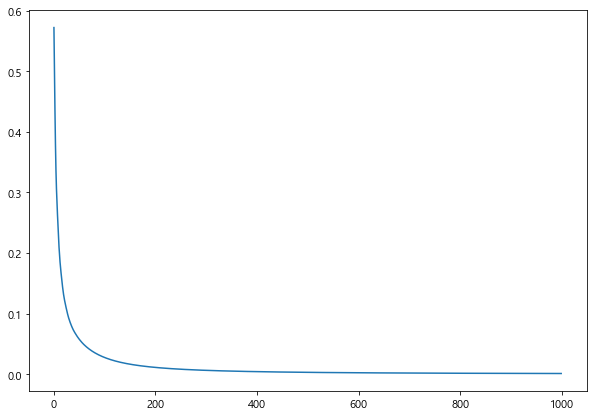

In [62]:
plt.figure(figsize=(10,7))
plt.plot(hist_cost)
plt.show()

### 예측 및 평가

In [64]:
def hxfn(xdata):
    xd = tf.constant(xdata, tf.float32)
    z = tf.matmul(xd, w) + b
    hx = tf.nn.sigmoid(z)
    return (hx.numpy() > 0.5 )+0

In [65]:
( hxfn(x_train)==y_train ).mean()

1.0

In [69]:
confmat_t = confusion_matrix(y_train, hxfn(x_train))

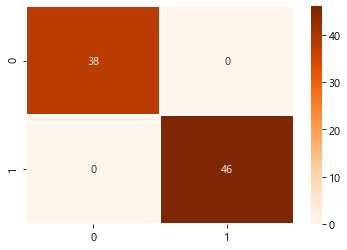

In [72]:
sns.heatmap(confmat_t, annot=True, cmap='Oranges', linewidths=0.5)
plt.show()

In [75]:
print(classification_report(y_train, hxfn(x_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        46

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [85]:
print(classification_report(y_test, hxfn(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        25

    accuracy                           1.00        46
   macro avg       1.00      1.00      1.00        46
weighted avg       1.00      1.00      1.00        46



## 학습 - 케라스

In [76]:
dense = Dense(units=1, input_dim=x_train.shape[1], activation="sigmoid")    
model = Sequential( [dense] )
model.compile( loss="binary_crossentropy", optimizer=Adam(0.1), metrics=['acc'] ) # loss func. 정의
h = model.fit(x_train, y_train, epochs=1000)

Epoch 1/1000
3/3 [==============================] - 0s 0s/step - loss: 0.7043 - acc: 0.5476
Epoch 2/1000
3/3 [==============================] - 0s 499us/step - loss: 0.4238 - acc: 0.8214
Epoch 3/1000
3/3 [==============================] - 0s 998us/step - loss: 0.2944 - acc: 0.8929
Epoch 4/1000
3/3 [==============================] - 0s 997us/step - loss: 0.2539 - acc: 0.9167
Epoch 5/1000
3/3 [==============================] - 0s 997us/step - loss: 0.2159 - acc: 0.9048
Epoch 6/1000
3/3 [==============================] - 0s 998us/step - loss: 0.1864 - acc: 0.9048
Epoch 7/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.1690 - acc: 0.9286
Epoch 8/1000
3/3 [==============================] - 0s 499us/step - loss: 0.1571 - acc: 0.9286
Epoch 9/1000
3/3 [==============================] - 0s 998us/step - loss: 0.1395 - acc: 0.9405
Epoch 10/1000
3/3 [==============================] - 0s 997us/step - loss: 0.1245 - acc: 0.9762
Epoch 11/1000
3/3 [==============================] - 0

3/3 [==============================] - 0s 997us/step - loss: 0.0033 - acc: 1.0000
Epoch 172/1000
3/3 [==============================] - 0s 498us/step - loss: 0.0033 - acc: 1.0000
Epoch 173/1000
3/3 [==============================] - 0s 991us/step - loss: 0.0032 - acc: 1.0000
Epoch 174/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0032 - acc: 1.0000
Epoch 175/1000
3/3 [==============================] - 0s 998us/step - loss: 0.0032 - acc: 1.0000
Epoch 176/1000
3/3 [==============================] - 0s 499us/step - loss: 0.0032 - acc: 1.0000
Epoch 177/1000
3/3 [==============================] - 0s 997us/step - loss: 0.0031 - acc: 1.0000
Epoch 178/1000
3/3 [==============================] - 0s 997us/step - loss: 0.0031 - acc: 1.0000
Epoch 179/1000
3/3 [==============================] - 0s 997us/step - loss: 0.0031 - acc: 1.0000
Epoch 180/1000
3/3 [==============================] - 0s 498us/step - loss: 0.0030 - acc: 1.0000
Epoch 181/1000
3/3 [===========================

Epoch 256/1000
3/3 [==============================] - 0s 499us/step - loss: 0.0017 - acc: 1.0000
Epoch 257/1000
3/3 [==============================] - 0s 998us/step - loss: 0.0017 - acc: 1.0000
Epoch 258/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0017 - acc: 1.0000
Epoch 259/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0017 - acc: 1.0000
Epoch 260/1000
3/3 [==============================] - 0s 997us/step - loss: 0.0017 - acc: 1.0000
Epoch 261/1000
3/3 [==============================] - 0s 998us/step - loss: 0.0017 - acc: 1.0000
Epoch 262/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0017 - acc: 1.0000
Epoch 263/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0017 - acc: 1.0000
Epoch 264/1000
3/3 [==============================] - 0s 498us/step - loss: 0.0017 - acc: 1.0000
Epoch 265/1000
3/3 [==============================] - 0s 997us/step - loss: 0.0016 - acc: 1.0000
Epoch 266/1000
3/3 [==================

3/3 [==============================] - 0s 1ms/step - loss: 7.6353e-04 - acc: 1.0000
Epoch 423/1000
3/3 [==============================] - 0s 1ms/step - loss: 7.6142e-04 - acc: 1.0000
Epoch 424/1000
3/3 [==============================] - 0s 1ms/step - loss: 7.5708e-04 - acc: 1.0000
Epoch 425/1000
3/3 [==============================] - 0s 997us/step - loss: 7.5340e-04 - acc: 1.0000
Epoch 426/1000
3/3 [==============================] - 0s 997us/step - loss: 7.5051e-04 - acc: 1.0000
Epoch 427/1000
3/3 [==============================] - 0s 1ms/step - loss: 7.4769e-04 - acc: 1.0000
Epoch 428/1000
3/3 [==============================] - 0s 499us/step - loss: 7.4491e-04 - acc: 1.0000
Epoch 429/1000
3/3 [==============================] - 0s 998us/step - loss: 7.4184e-04 - acc: 1.0000
Epoch 430/1000
3/3 [==============================] - 0s 498us/step - loss: 7.3953e-04 - acc: 1.0000
Epoch 431/1000
3/3 [==============================] - 0s 998us/step - loss: 7.3556e-04 - acc: 1.0000
Epoch 432/100

3/3 [==============================] - 0s 997us/step - loss: 4.3180e-04 - acc: 1.0000
Epoch 585/1000
3/3 [==============================] - 0s 499us/step - loss: 4.3024e-04 - acc: 1.0000
Epoch 586/1000
3/3 [==============================] - 0s 499us/step - loss: 4.2903e-04 - acc: 1.0000
Epoch 587/1000
3/3 [==============================] - 0s 997us/step - loss: 4.2776e-04 - acc: 1.0000
Epoch 588/1000
3/3 [==============================] - 0s 998us/step - loss: 4.2651e-04 - acc: 1.0000
Epoch 589/1000
3/3 [==============================] - 0s 499us/step - loss: 4.2498e-04 - acc: 1.0000
Epoch 590/1000
3/3 [==============================] - 0s 997us/step - loss: 4.2381e-04 - acc: 1.0000
Epoch 591/1000
3/3 [==============================] - 0s 998us/step - loss: 4.2259e-04 - acc: 1.0000
Epoch 592/1000
3/3 [==============================] - 0s 498us/step - loss: 4.2111e-04 - acc: 1.0000
Epoch 593/1000
3/3 [==============================] - 0s 997us/step - loss: 4.1995e-04 - acc: 1.0000
Epoch

3/3 [==============================] - 0s 998us/step - loss: 2.7316e-04 - acc: 1.0000
Epoch 747/1000
3/3 [==============================] - 0s 998us/step - loss: 2.7239e-04 - acc: 1.0000
Epoch 748/1000
3/3 [==============================] - 0s 998us/step - loss: 2.7176e-04 - acc: 1.0000
Epoch 749/1000
3/3 [==============================] - 0s 998us/step - loss: 2.7097e-04 - acc: 1.0000
Epoch 750/1000
3/3 [==============================] - 0s 998us/step - loss: 2.7040e-04 - acc: 1.0000
Epoch 751/1000
3/3 [==============================] - 0s 997us/step - loss: 2.6966e-04 - acc: 1.0000
Epoch 752/1000
3/3 [==============================] - 0s 998us/step - loss: 2.6892e-04 - acc: 1.0000
Epoch 753/1000
3/3 [==============================] - 0s 498us/step - loss: 2.6832e-04 - acc: 1.0000
Epoch 754/1000
3/3 [==============================] - 0s 498us/step - loss: 2.6763e-04 - acc: 1.0000
Epoch 755/1000
3/3 [==============================] - 0s 997us/step - loss: 2.6710e-04 - acc: 1.0000
Epoch

3/3 [==============================] - 0s 997us/step - loss: 1.8401e-04 - acc: 1.0000
Epoch 909/1000
3/3 [==============================] - 0s 997us/step - loss: 1.8363e-04 - acc: 1.0000
Epoch 910/1000
3/3 [==============================] - 0s 499us/step - loss: 1.8337e-04 - acc: 1.0000
Epoch 911/1000
3/3 [==============================] - 0s 498us/step - loss: 1.8290e-04 - acc: 1.0000
Epoch 912/1000
3/3 [==============================] - 0s 499us/step - loss: 1.8246e-04 - acc: 1.0000
Epoch 913/1000
3/3 [==============================] - 0s 499us/step - loss: 1.8195e-04 - acc: 1.0000
Epoch 914/1000
3/3 [==============================] - 0s 499us/step - loss: 1.8157e-04 - acc: 1.0000
Epoch 915/1000
3/3 [==============================] - 0s 499us/step - loss: 1.8110e-04 - acc: 1.0000
Epoch 916/1000
3/3 [==============================] - 0s 1ms/step - loss: 1.8074e-04 - acc: 1.0000
Epoch 917/1000
3/3 [==============================] - 0s 1ms/step - loss: 1.8030e-04 - acc: 1.0000
Epoch 918

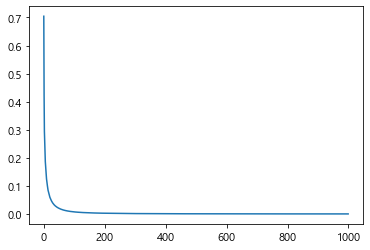

In [77]:
plt.plot(h.history['loss'])
plt.show()

In [81]:
confmat_k = confusion_matrix(y_train, (model.predict(x_train) > 0.5 + 0) )

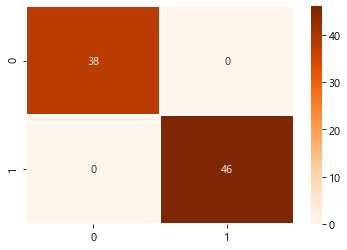

In [82]:
sns.heatmap(confmat_k, annot=True, cmap='Oranges', linewidths=0.5)
plt.show()

In [83]:
print(classification_report(y_train, (model.predict(x_train) > 0.5 + 0) ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        46

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [84]:
print(classification_report(y_test, (model.predict(x_test) > 0.5 + 0) ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        25

    accuracy                           1.00        46
   macro avg       1.00      1.00      1.00        46
weighted avg       1.00      1.00      1.00        46

